___

### les bases
___
* sélectionner un estimateur et préciser ses hyperparamètres : modele = LinearRegression(.........)
* Entrainer le modèle sur les données X, y (divisées en 2 tableaux Numpy) : model.fit(X, y)
* Evaluer le modèle : model.score(X, y)
* Utiliser le modèle : model.predict(X)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
# df_original = pd.read_csv("données d'origine.csv")
df_original = pd.read_csv("data_cleaned_cheated.csv")
df = df_original[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'charges_group_cheat']]

df['group'] = np.where(df['charges'] < 4746.344000, '1', 
                             np.where(df['charges'] < 9386.161300, '2', 
                             np.where(df['charges'] < 16657.717450, '3', '4')))

# df = df[df['charges'] < 49000]
# df_group['group'] = np.where(df_group['charges'] < 4719.736550, '1', 
                            #  np.where(df_group['charges'] < 9301.893550, '2', 
                            #  np.where(df_group['charges'] < 16297.846000, '3', '4')))

mapping_sex = {'male': 0, 'female': 1}
mapping_smoker = {'yes': 1, 'no': 0}

# df['sex'] = df['sex'].map(mapping_sex)
# df['smoker'] = df['smoker'].map(mapping_smoker)
df['northeast'] = 0
df['southeast'] = 0
df['northwest'] = 0
df['southwest'] = 0
df.loc[df['region'] == 'northeast', 'northeast'] = 1
df.loc[df['region'] == 'southeast', 'southeast'] = 1
df.loc[df['region'] == 'northwest', 'northwest'] = 1
df.loc[df['region'] == 'southwest', 'southwest'] = 1

df.loc[:, 'smoker_bmi'] = df['smoker'] * df['bmi']
df.loc[:, 'smoker_age'] = df['smoker'] * df['age']

# df.loc[:, 'charges_group'] = np.where(df['smoker'] == 0, 1,
#                                       np.where(df['bmi'] >= 30, 3,
#                                                np.where(df['sex'] == 0, 2,
#                                                         np.where(df['age'] < 22, 1, 3))))
df.loc[:, 'charges_group'] = np.where(df['smoker'] == 0, 1,
                                      np.where(df['bmi'] >= 30, 3,
                                               2))

df.loc[:, 'diff_charges_group'] = abs(df['charges_group'] - df['charges_group_cheat'])
df['children'] = np.where(df['children'] > 0, 1, 0) 

# nettoyage
df = df[['age', 'sex', 'bmi', 'children', 'smoker', 'smoker_bmi', 'smoker_age', 'northeast', 'southeast', 'northwest', 'southwest', 'charges', 'charges_group_cheat', 'diff_charges_group', 'charges_group', 'group']]
# df = df[['age', 'sex', 'bmi', 'smoker', 'charges', 'charges_group', 'charges_group2', 'charges_group3']]

display(df, df['diff_charges_group'].sum())
# display(df.isnull().sum())

/var/folders/83/skc59h713n1f5fpwznbhnkr80000gn/T/ipykernel_1231/689199495.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = np.where(df['charges'] < 4746.344000, '1',


,age,sex,bmi,children,smoker,smoker_bmi,smoker_age,northeast,southeast,northwest,southwest,charges,charges_group_cheat,diff_charges_group,charges_group,group
0,19,1,27.900,0,1,27.90,19,0,0,0,1,16884.92400,2,0,2,4
1,18,0,33.770,1,0,0.00,0,0,1,0,0,1725.55230,1,0,1,1
2,28,0,33.000,1,0,0.00,0,0,1,0,0,4449.46200,1,0,1,1
3,33,0,22.705,0,0,0.00,0,0,0,1,0,21984.47061,2,1,1,4
4,32,0,28.880,0,0,0.00,0,0,0,1,0,3866.85520,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,50,0,30.970,1,0,0.00,0,0,0,1,0,10600.54830,1,0,1,3
1333,18,1,31.920,0,0,0.00,0,1,0,0,0,2205.98080,1,0,1,1
1334,18,1,36.850,0,0,0.00,0,0,1,0,0,1629.83350,1,0,1,1
1335,21,1,25.800,0,0,0.00,0,0,0,0,1,2007.94500,1,0,1,1


106

___

### LinearRegression
___

In [8]:
from sklearn.model_selection import train_test_split # pour diviser le jeu de données initial en 1 jeu d'entrainement (X_train, y_train) et un jeu de test (X_test, y_test)
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

y = df[['charges']]
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'smoker_bmi', 'northeast', 'southeast', 'northwest', 'southwest']] # southeast
X = df[['age', 'bmi', 'children', 'smoker', 'smoker_bmi', 'charges_group']]
X_dummies = pd.get_dummies(df[['age', 'bmi', 'smoker', 'smoker_bmi', 'children']], columns=['age', 'bmi', 'smoker', 'smoker_bmi', 'children'], drop_first=True)
# display(X)

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, shuffle=True, train_size=0.85, random_state=42, stratify=X_dummies['smoker_1'])
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_train)
predictions2 = model.predict(X_test)
# print(model.score(X_train, y_train), r2_score(y_train, predictions))
print(model.score(X_test, y_test), r2_score(y_test, predictions2))

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(round(model.score(X_test, y_test)*100, 2), "|", round(r2_score(y_test, predictions)*100, 2))

# model = LinearRegression()
# model.fit(X_train, y_train)
# model.score(X_train, y_train)

# step = np.arange(0,1.1,1)
# param_grid = {'alpha': np.arange(0,1),
#               'l1_ratio': np.arange(0,1)}
# grid = GridSearchCV(ElasticNet(), param_grid, cv = 42)
# grid.fit(X_train, y_train)

# print('')
# print('_______________________________________________________')
# print('###BEST### >>>', round(grid.best_score_, 2))

-6.379064744974361e+25 -6.379064744974361e+25
92.87 | 92.87


___

### PolynomialFeatures
___

In [9]:
from sklearn.model_selection import train_test_split # pour diviser le jeu de données initial en 1 jeu d'entrainement (X_train, y_train) et un jeu de test (X_test, y_test)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler

y = df[['charges']]
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'smoker_bmi', 'northeast', 'southeast', 'northwest', 'southwest']] # southeast
X = df[['age', 'bmi', 'children', 'smoker', 'smoker_bmi', 'charges_group']]
# display(X)

# X = pd.get_dummies(X[['age', 'bmi', 'children', 'smoker', 'smoker_bmi', 'charges_group']], columns=['age', 'smoker'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

X_train_robust = RobustScaler().fit_transform(X_train)

#creer variables polynomiales a partir de nos variables
X_poly = PolynomialFeatures(2).fit_transform(X_train_robust)
X_poly_robust = RobustScaler().fit_transform(X_poly)

# Crée le modèle de régression linéaire
model = LinearRegression()

# Entraîne le modèle sur les données d'entraînement
model.fit(X_poly, y_train)

# Faire des prédictions sur les données d'entraînement
predictions_train = model.predict(X_poly_robust)

# Calcule le R^2 et l'erreur quadratique moyenne (MSE) sur les données d'entraînement
r2_train = r2_score(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = np.sqrt(mse_train)

print(f"R^2 Score (Train): {r2_train}")
# print(f"MSE (Train): {mse_train}")
# print(f"RMSE (Train): {rmse_train}")

R^2 Score (Train): 0.8515265431219852


In [6]:
from sklearn.model_selection import train_test_split # pour diviser le jeu de données initial en 1 jeu d'entrainement (X_train, y_train) et un jeu de test (X_test, y_test)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler

y = df[['charges']]
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'smoker_bmi', 'northeast', 'southeast', 'northwest', 'southwest']] # southeast
X = df[['age', 'bmi', 'children', 'smoker', 'smoker_bmi', 'charges_group']]

# X = pd.get_dummies(X[['age', 'bmi', 'children', 'smoker', 'smoker_bmi', 'charges_group']], columns=['smoker'], drop_first=True)
# display(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

X_train_robust = RobustScaler().fit_transform(X_train)
X_test_robust = RobustScaler().fit_transform(X_test)

#creer variables polynomiales a partir de nos variables
PolyNome = 2
X_poly = PolynomialFeatures(PolyNome).fit_transform(X_train_robust)
X_poly_robust = RobustScaler().fit_transform(X_poly)
X_test_poly = PolynomialFeatures(PolyNome).fit_transform(X_test_robust)

# Crée le modèle de régression linéaire
model = LinearRegression()

# Entraîne le modèle sur les données d'entraînement
model.fit(X_poly, y_train)

# Faire des prédictions sur les données d'entraînement
predictions_train = model.predict(X_poly_robust)

# Calcule le R^2 et l'erreur quadratique moyenne (MSE) sur les données d'entraînement
# r2_train = r2_score(y_train, predictions_train)
# mse_train = mean_squared_error(y_train, predictions_train)
# rmse_train = np.sqrt(mse_train)

# print(f"R^2 Score (Train): {r2_train}")

model = LinearRegression()
model.fit(X_poly, y_train)
print(round(model.score(X_test_poly, y_test)*100, 2))

92.65


___

MODELE AVEC PIPELINES
___

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import RobustScaler, StandardScaler




y = df[['charges']]
X = df[['age', 'bmi', 'children', 'smoker', 'smoker_bmi']]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

PolyNome = 2

model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(PolyNome),
    LassoCV()
)

model.fit(X_train, y_train)

predictions_train = model.predict(X_train)

r2_train = r2_score(y_train, predictions_train)
print(f"R^2 Score (Train): {r2_train}")

predictions_test = model.predict(X_test)

r2_test = r2_score(y_test, predictions_test)
print(f"R^2 Score (Test): {r2_test}")

/Users/saadia/Documents/coding_projects/insurance/insurance_premium_SC/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saadia/Documents/coding_projects/insurance/insurance_premium_SC/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.968e+08, tolerance: 1.667e+07
  model = cd_fast.enet_coordinate_descent(


R^2 Score (Train): 0.8317556568557471
R^2 Score (Test): 0.9039483892335947


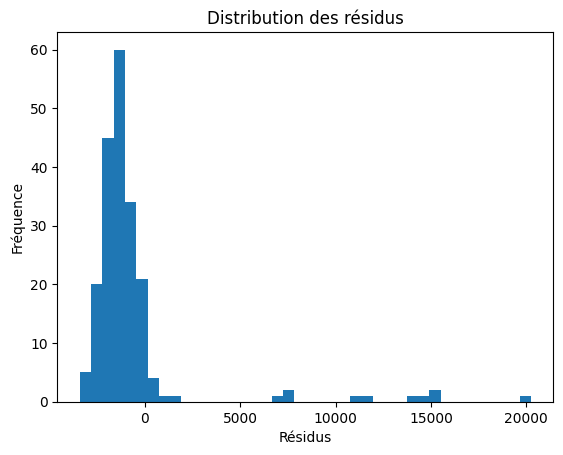

In [25]:
#on visualise les predictions en calculant les résidus sur le modele ci-dessus
residus = y_test.values.flatten() - predictions_test

# Affichage de la distribution des résidus
plt.hist(residus, bins=40)
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.title("Distribution des résidus")
plt.show()

L'histogramme ci-dessus nous permet de visualiser la distribution des résidus, c'est à dire  des différences entre les valeurs prédites établies par notre modèle et les valeurs réelles.

Une distribution centrée en 0 correspond à un modéle qui fait des predictions précises. Notre modéle est globalement assez précis sur les prédictions faites, hormis quelques valeurs où l'erreur est de 7500 à 20000 entre les prédictions et les valeurs réelles.

Un barplot serait intéressant pour voir où se trompe mon modele.

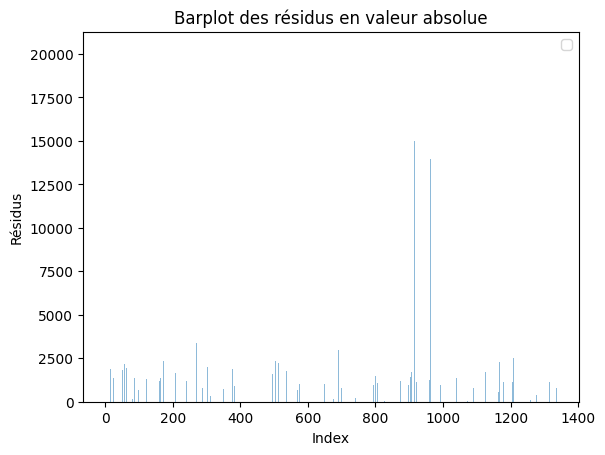

In [29]:
# On visualise les prédictions en calculant les résidus
residus = y_test.values.flatten() - predictions_test #y_test.values renvoie un tableau numpy, flatten() renvoie un tableau à 1 colonne

# barplot des résidus
plt.bar(y_test.index, np.abs(residus), alpha=0.5, label='|Résidus|')  # Barres pour les résidus en valeur absolue
plt.xlabel("Index")
plt.ylabel("Résidus")
plt.title("Barplot des résidus en valeur absolue")
plt.legend('')
plt.show()


Sur le barplot des residus en valeur absolue, on voit que les barres sont assez bien dispersées sur les index, et de magnitude comprise en 0 et 3000 environ. Sur notre échantillon test, Deux barres se demarquent pour les index compris entre 900 et 1000 et ont des residus superieurs à 12500. Cela peut indiquer que le modèle a des difficultés à prédire correctement les valeurs pour ces observations spécifiques

In [34]:
#checker les index des valeurs residuelles fortes, disons plus de 12000
seuil_residu = 12000

residus = y_test.values.flatten() - predictions_test

# Affichage des indices des observations avec des résidus élevés
indice_residu_fort = np.where(np.abs(residus) > seuil_residu)[0]

print("Indices des observations avec des résidus élevés:")
print(indice_residu_fort)

# Utilisez les indices pour accéder aux observations spécifiques dans le DataFrame
observations_elevees = df.iloc[indice_residu_fort]

# Affichez les caractéristiques des observations avec des résidus élevés
print("Observations avec des résidus élevés:")
print(observations_elevees)

Indices des observations avec des résidus élevés:
[ 19  92  98 113 124]
Observations avec des résidus élevés:
     age  sex     bmi  children  smoker  smoker_bmi  smoker_age  northeast  \
19    30    0  35.300         0       1       35.30          30          0   
92    59    0  29.830         1       1       29.83          59          1   
98    56    0  19.950         0       1       19.95          56          1   
113   21    1  35.720         0       0        0.00           0          0   
124   47    1  33.915         1       0        0.00           0          0   

     southeast  northwest  southwest      charges  charges_group_cheat  \
19           0          0          1  36837.46700                    3   
92           0          0          0  30184.93670                    2   
98           0          0          0  22412.64850                    2   
113          0          1          0   2404.73380                    1   
124          0          1          0  10115.00885  

### Distance de Cook

La distance de Cook mesure la somme des distances entre les valeurs observées et prédites, normalisée par la variance résiduelle et le nombre de paramètres dans le modèle.

Les observations ayant une distance de Cook élevée sont considérées comme influentes, c'est-à-dire qu'elles ont un impact important sur les paramètres du modèle. 
Les observations influentes peuvent être des points aberrants (outliers) ou des observations qui, si elles étaient retirées, modifieraient considérablement les paramètres du modèle.

In [43]:
from yellowbrick.regressor import CooksDistance

visualizer = CooksDistance()
visualizer.fit(X_train, y_train)
visualizer.show()

# Récupérez les indices des observations influentes
influential_indices = visualizer.distance_influence_.index

print("Indices des observations influentes:")
print(influential_indices)

ValueError: shapes (1136,1) and (1136,1) not aligned: 1 (dim 1) != 1136 (dim 0)

In [52]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Votre code pour la définition de X, y, X_train, X_test, y_train, y_test, et PolyNome...

# Votre modèle avec Lasso et transformation polynomiale
model = make_pipeline(
    RobustScaler(),
    PolynomialFeatures(degree=PolyNome),
    Lasso(alpha=0.1)
)

# Ajustez le modèle sur les données d'entraînement
model.fit(X_train, y_train.values.flatten())

# calcul des residus avec distance de cook 
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm)
results = model_sm.fit()

# Obtenez les résidus et les distances de Cook
residuals = results.resid
influence = results.get_influence()
cooks_distance = influence.cooks_distance[0]

# Ajoutez les distances de Cook à votre DataFrame original
df_with_cooks = X_train.copy()
df_with_cooks['Cook\'s Distance'] = cooks_distance

# Affichez le DataFrame avec les distances de Cook
print(df_with_cooks)

# Affichez le modèle et les statistiques
print(results.summary())

# Votre code pour les prédictions et les scores R^2...


      age     bmi  children  smoker  smoker_bmi  charges_group  \
1094   18  31.350         1       0         0.0              1   
94     64  31.300         1       1        31.3              3   
349    19  27.835         0       0         0.0              1   
410    19  17.480         0       0         0.0              1   
981    31  25.900         1       1        25.9              2   
...   ...     ...       ...     ...         ...            ...   
674    45  21.375         0       0         0.0              1   
752    58  22.770         0       0         0.0              1   
319    32  37.335         1       0         0.0              1   
934    59  27.500         0       0         0.0              1   
1113   23  24.510         0       0         0.0              1   

      Cook's Distance  
1094         0.000036  
94           0.000064  
349          0.000025  
410          0.000056  
981          0.000063  
...               ...  
674          0.000175  
752          0.

/Users/saadia/Documents/coding_projects/insurance/insurance_premium_SC/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.180e+10, tolerance: 1.667e+07
  model = cd_fast.enet_coordinate_descent(


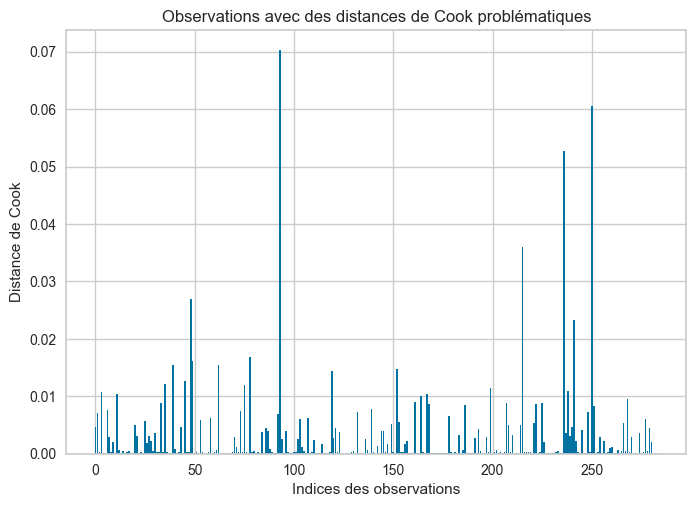

In [51]:
import statsmodels.api as sm

# statsmodels pour obtenir les distances de Cook
X_train_sm = sm.add_constant(X_train) #ajoute une colonne constante (pr le modele d'interception) à matrice X_train
model_sm = sm.OLS(y_train, X_train_sm) #cree objet de modele OLS, ytrain est ajustée en fonction des variables Xtrain_sm
results = model_sm.fit() #ajuste le modele aux données entraienemnt 

# Obtenez les distances de Cook
influence = results.get_influence() #apelle fonctionget_influence sur objet results  pour avoir un objet 'OLSInfluence' qui contient diagnostics d'influence dont distance de cook
cooks_distance = influence.cooks_distance[0] #extrait distance de cook de olsinfluence

# Seuil = quartile supérieur
seuil_cook = np.percentile(cooks_distance, 75)

# Filtrer les observations avec des distances de Cook élevées
observations_problematiques = cooks_distance[cooks_distance > seuil_cook]

# Visualisez les observations problématiques avec un graphique de barres
plt.bar(range(len(observations_problematiques)), observations_problematiques)
plt.xlabel("Indices des observations")
plt.ylabel("Distance de Cook")
plt.title("Observations avec des distances de Cook problématiques")
plt.show()
